# ABOUT:
- this notebook:
    - made test set predictions using stacking and model models
- insights:
    - **both stacking and voting led to considerable gains**

### read_csv

In [2]:
import pandas as pd
test = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_test_set.csv",index_col = "respondent_id") 

### load stacking and voting classifiers

In [1]:
seasonal_vaccine_stacking = pickle.load(open(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\model\seasonal_vaccine_stacking.pkl", 'rb'))
seasonal_vaccine_voting = pickle.load(open(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\model\seasonal_vaccine_voting.pkl", 'rb'))
h1n1_vaccine_stacking = pickle.load(open(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\model\h1n1_vaccine_stacking.pkl", 'rb'))
h1n1_vaccine_voting = pickle.load(open(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\model\h1n1_vaccine_voting.pkl", 'rb'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### make predictions and save

In [7]:
h1n1_vaccine_proba = h1n1_vaccine_stacking.predict_proba(test)[:,1]
seasonal_vaccine_proba = seasonal_vaccine_stacking.predict_proba(test)[:,1]
output = pd.DataFrame({"respondent_id":test.index, 
                       "h1n1_vaccine": h1n1_vaccine_proba,
                       "seasonal_vaccine":seasonal_vaccine_proba
                      })
output.set_index("respondent_id").to_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\predictions\stacking 0.csv")

In [8]:
h1n1_vaccine_proba = h1n1_vaccine_voting.predict_proba(test)[:,1]
seasonal_vaccine_proba = seasonal_vaccine_voting.predict_proba(test)[:,1]
output = pd.DataFrame({"respondent_id":test.index, 
                       "h1n1_vaccine": h1n1_vaccine_proba,
                       "seasonal_vaccine":seasonal_vaccine_proba
                      })
output.set_index("respondent_id").to_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\predictions\voting 0.csv")

# Results 
- **both stacking and voting yield great gains!**
- voting classifier was just marginally better

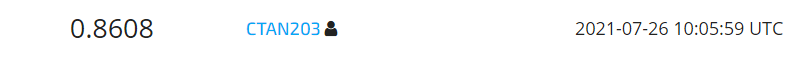

In [13]:
from IPython.display import Image     # stacking
Image(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\RAM\stacking 0.PNG")

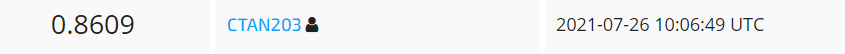

In [12]:
# voting
Image(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\RAM\voting 0.PNG")